# **Apple Stock Price Prediction using LSTM**

In [1]:
#Import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import datetime as dt
import seaborn as sns
import pandas_datareader.data as web
%pip install yfinance
import yfinance as yf

Note: you may need to restart the kernel to use updated packages.


Keyring is skipped due to an exception: 'keyring.backends'


## Reading in the Data

In [3]:
AAPL = yf.download('AAPL', start='2018-01-01', end='2018-12-31')

AAPL.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.670986,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.663887,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.852772,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.317898,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.164436,82271200


## Gather data for model training set

In [4]:
training_set = AAPL.iloc[:,0:1].values

print(training_set)
print(training_set.shape)

[[42.54000092]
 [43.13249969]
 [43.13499832]
 [43.36000061]
 [43.58750153]
 [43.63750076]
 [43.29000092]
 [43.64749908]
 [44.04499817]
 [44.47499847]
 [44.03749847]
 [44.84249878]
 [44.65250015]
 [44.32500076]
 [44.32500076]
 [44.3125    ]
 [43.62749863]
 [43.        ]
 [42.54000092]
 [41.38249969]
 [41.71749878]
 [41.79249954]
 [41.5       ]
 [39.77500153]
 [38.70750046]
 [40.77249908]
 [40.07249832]
 [39.26750183]
 [39.625     ]
 [40.48749924]
 [40.75999832]
 [42.44749832]
 [43.09000015]
 [43.01250076]
 [43.20750046]
 [42.95000076]
 [43.41749954]
 [44.08750153]
 [44.77500153]
 [44.81499863]
 [44.63499832]
 [43.20000076]
 [43.80250168]
 [44.47750092]
 [43.73500061]
 [43.86999893]
 [44.49000168]
 [45.07249832]
 [45.64749908]
 [45.08000183]
 [44.625     ]
 [44.66249847]
 [44.33000183]
 [43.81000137]
 [43.75999832]
 [42.5       ]
 [42.09749985]
 [42.01750183]
 [43.41999817]
 [41.8125    ]
 [41.95249939]
 [41.65999985]
 [41.90999985]
 [41.22000122]
 [43.14500046]
 [42.74250031]
 [42.47000

## Normalizing the Dataset

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set)

scaled_training_set

array([[0.26636825],
       [0.29505027],
       [0.29517122],
       [0.30606326],
       [0.31707625],
       [0.31949664],
       [0.30267467],
       [0.31998065],
       [0.33922301],
       [0.36003871],
       [0.33885996],
       [0.37782887],
       [0.36863131],
       [0.35277753],
       [0.35277753],
       [0.35217239],
       [0.31901245],
       [0.28863615],
       [0.26636825],
       [0.21033528],
       [0.2265521 ],
       [0.23018278],
       [0.2160233 ],
       [0.1325186 ],
       [0.0808424 ],
       [0.18080602],
       [0.14691999],
       [0.10795126],
       [0.12525724],
       [0.16700959],
       [0.18020088],
       [0.26189033],
       [0.29299292],
       [0.28924129],
       [0.29868094],
       [0.28621575],
       [0.3088467 ],
       [0.34128053],
       [0.37456142],
       [0.37649763],
       [0.36778407],
       [0.2983179 ],
       [0.3274841 ],
       [0.36015985],
       [0.32421647],
       [0.33075155],
       [0.36076499],
       [0.388

## Creating Data Structures and Reshaping the Data

In [6]:
X_train = []
y_train = []
for i in range(60, 250):
    X_train.append(scaled_training_set[i-60:i, 0])
    y_train.append(scaled_training_set[i,0])
X_train = np.array(X_train)
y_train = np.array(y_train)

print(X_train.shape)
print(y_train.shape)

(190, 60)
(190,)


In [7]:
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))

X_train.shape

(190, 60, 1)

## Executing the LSTM model

In [8]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [9]:
regressor =  Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [10]:
#Fitting the Model

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
6/6 [==============================] - 19s 199ms/step - loss: 0.2077
Epoch 2/100
6/6 [==============================] - 1s 117ms/step - loss: 0.0818
Epoch 3/100
6/6 [==============================] - 1s 144ms/step - loss: 0.0581
Epoch 4/100
6/6 [==============================] - 1s 171ms/step - loss: 0.0384
Epoch 5/100
6/6 [==============================] - 1s 156ms/step - loss: 0.0389
Epoch 6/100
6/6 [==============================] - 1s 153ms/step - loss: 0.0366
Epoch 7/100
6/6 [==============================] - 1s 166ms/step - loss: 0.0343
Epoch 8/100
6/6 [==============================] - 1s 166ms/step - loss: 0.0341
Epoch 9/100
6/6 [==============================] - 1s 116ms/step - loss: 0.0287
Epoch 10/100
6/6 [==============================] - 1s 100ms/step - loss: 0.0268
Epoch 11/100
6/6 [==============================] - 1s 102ms/step - loss: 0.0238
Epoch 12/100
6/6 [==============================] - 1s 119ms/step - loss: 0.0205
Epoch 13/100
6/6 [==================

In [11]:
# Extracting the actuals from 2019

AAPL_test = yf.download('AAPL', start='2019-01-01', end='2019-12-31')
actual_stock_price = AAPL_test.iloc[:,0:1].values

[*********************100%%**********************]  1 of 1 completed


In [12]:
# Preparing the Input for the Model
dataset_total = pd.concat((AAPL['Open'], AAPL_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(AAPL_test)-60:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(60,310):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))

In [13]:
# Predicting the Values for the 2019 Stock Prices
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

8/8 [==============================] - 4s 65ms/step


## Plotting the Prediction

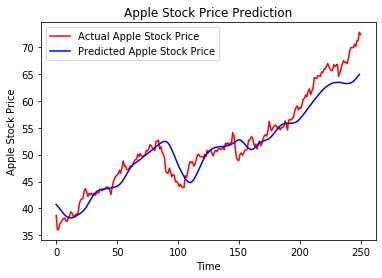

In [14]:
plt.plot(actual_stock_price, color = 'red', label = 'Actual Apple Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()